In [ ]:
#Entrega Andres Gojdycz - Analisis Big Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import kagglehub
import os

path = kagglehub.dataset_download("laotse/credit-risk-dataset")


# Busco el archivo
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        filepath = os.path.join(path, filename)
        break

# Leo archivo
df = pd.read_csv(filepath)
df.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [3]:
#veo que algunas variables presentan valores nulos, entre las distintas opciones que existen para lidiar con este problema decido reemplazarlos con la media


In [4]:
# Reemplazo valores nulos con la media de cada columna numérica
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Verifico que no queden valores nulos
print(df.isnull().sum())

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [5]:
np.sort(df['loan_int_rate'].unique())
#realiizo una exploracion de los datos que mas me interesan, como la tasa de interes del prestamo estimo sera sumamente determinante decido explorarla, encuentro que es mucho mas variada de lo que esperaba, pero dentro del rango esperado

array([ 5.42      ,  5.79      ,  5.99      ,  6.        ,  6.03      ,
        6.17      ,  6.39      ,  6.54      ,  6.62      ,  6.76      ,
        6.91      ,  6.92      ,  6.99      ,  7.05      ,  7.12      ,
        7.14      ,  7.29      ,  7.37      ,  7.4       ,  7.42      ,
        7.43      ,  7.49      ,  7.51      ,  7.66      ,  7.68      ,
        7.74      ,  7.75      ,  7.88      ,  7.9       ,  7.91      ,
        8.        ,  8.07      ,  8.32      ,  8.38      ,  8.49      ,
        8.59      ,  8.63      ,  8.7       ,  8.88      ,  8.9       ,
        8.94      ,  9.01      ,  9.07      ,  9.2       ,  9.25      ,
        9.32      ,  9.33      ,  9.38      ,  9.45      ,  9.51      ,
        9.62      ,  9.63      ,  9.64      ,  9.67      ,  9.7       ,
        9.76      ,  9.83      ,  9.88      ,  9.91      ,  9.96      ,
        9.99      , 10.        , 10.01      , 10.08      , 10.14      ,
       10.2       , 10.25      , 10.28      , 10.33      , 10.36

In [6]:
np.sort(df['person_emp_length'].unique())

array([  0.       ,   1.       ,   2.       ,   3.       ,   4.       ,
         4.7896863,   5.       ,   6.       ,   7.       ,   8.       ,
         9.       ,  10.       ,  11.       ,  12.       ,  13.       ,
        14.       ,  15.       ,  16.       ,  17.       ,  18.       ,
        19.       ,  20.       ,  21.       ,  22.       ,  23.       ,
        24.       ,  25.       ,  26.       ,  27.       ,  28.       ,
        29.       ,  30.       ,  31.       ,  34.       ,  38.       ,
        41.       , 123.       ])

In [7]:
df[df['person_emp_length'].astype(str).str.contains('123')]
#encuentro algunos datos probablemente mal cargados, como el caso de una persona de 22 años con mas de 100 de trabajo. Estos datos son tratados mas adelante

person_age  person_income person_home_ownership  person_emp_length  \
0            22          59000                  RENT              123.0   
210          21         192000              MORTGAGE              123.0   

    loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0      PERSONAL          D      35000          16.02            1   
210     VENTURE          A      20000           6.54            0   

     loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                   0.59                         Y                           3  
210                 0.10                         N                           4

In [8]:
df[['person_income','loan_int_rate','loan_percent_income','person_age']].describe(percentiles=[0.05, 0.25, 0.50, 0.75, 0.95])

person_income  loan_int_rate  loan_percent_income    person_age
count   3.258100e+04   32581.000000         32581.000000  32581.000000
mean    6.607485e+04      11.011695             0.170203     27.734600
std     6.198312e+04       3.081605             0.106782      6.348078
min     4.000000e+03       5.420000             0.000000     20.000000
5%      2.288000e+04       6.030000             0.040000     22.000000
25%     3.850000e+04       8.490000             0.090000     23.000000
50%     5.500000e+04      11.011695             0.150000     26.000000
75%     7.920000e+04      13.110000             0.230000     30.000000
95%     1.380000e+05      16.290000             0.380000     40.000000
max     6.000000e+06      23.220000             0.830000    144.000000

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (32581, 12)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  3
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number o

Number of All Scatter Plots = 6


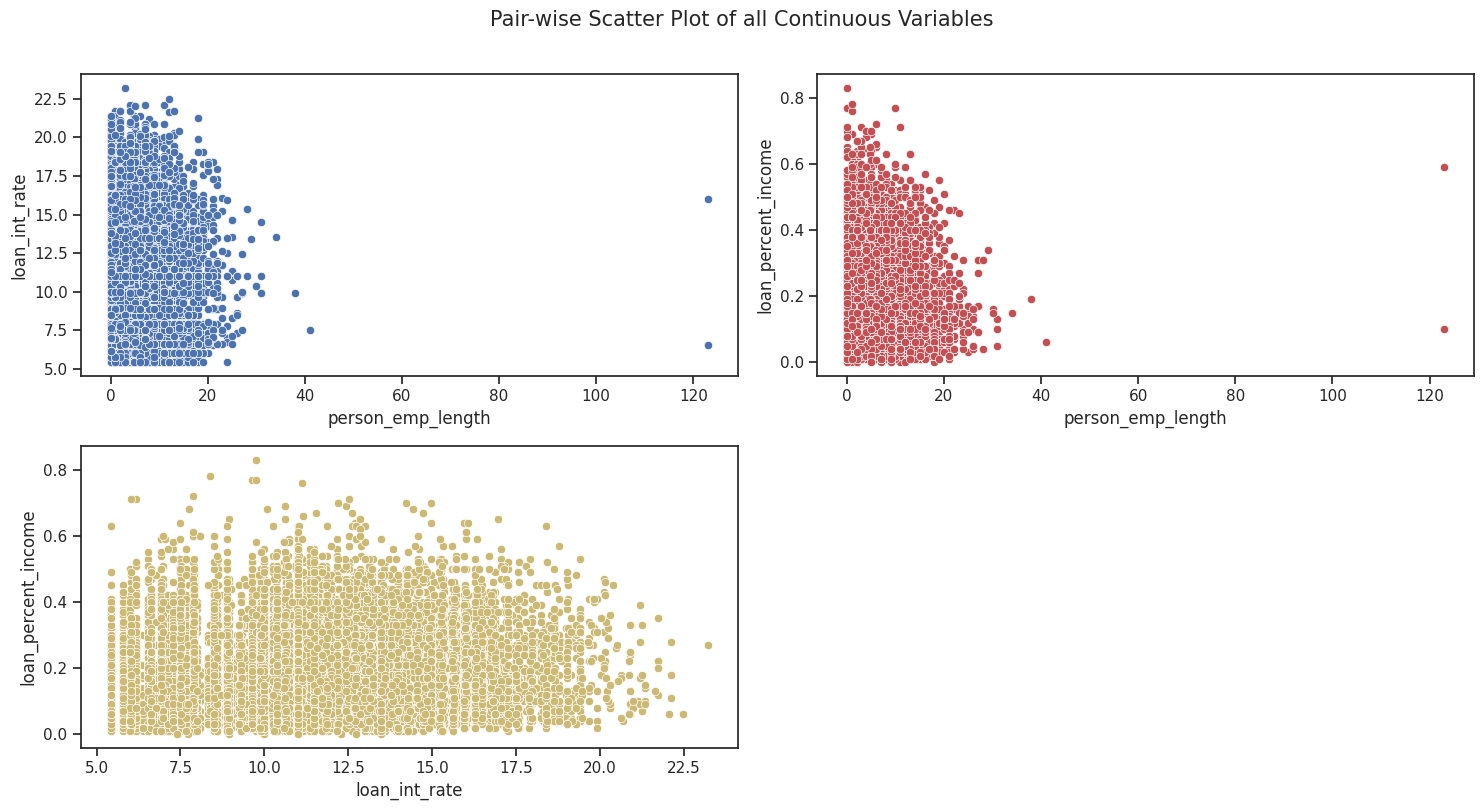

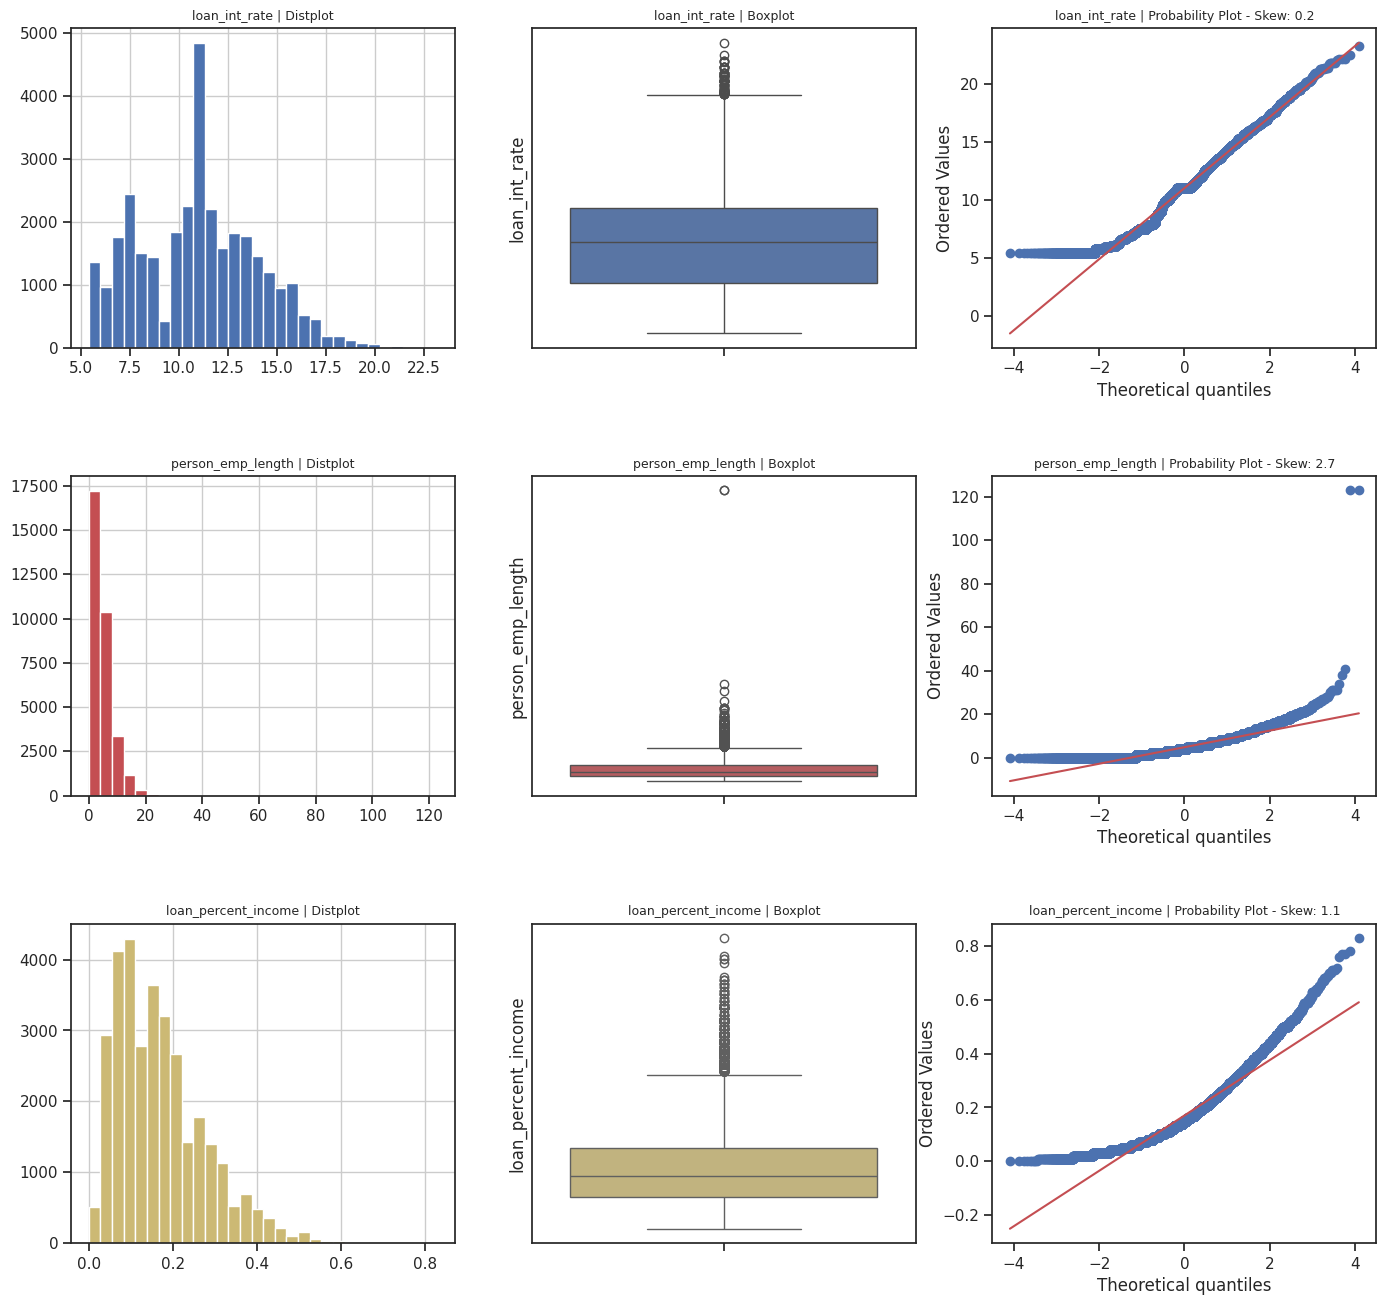

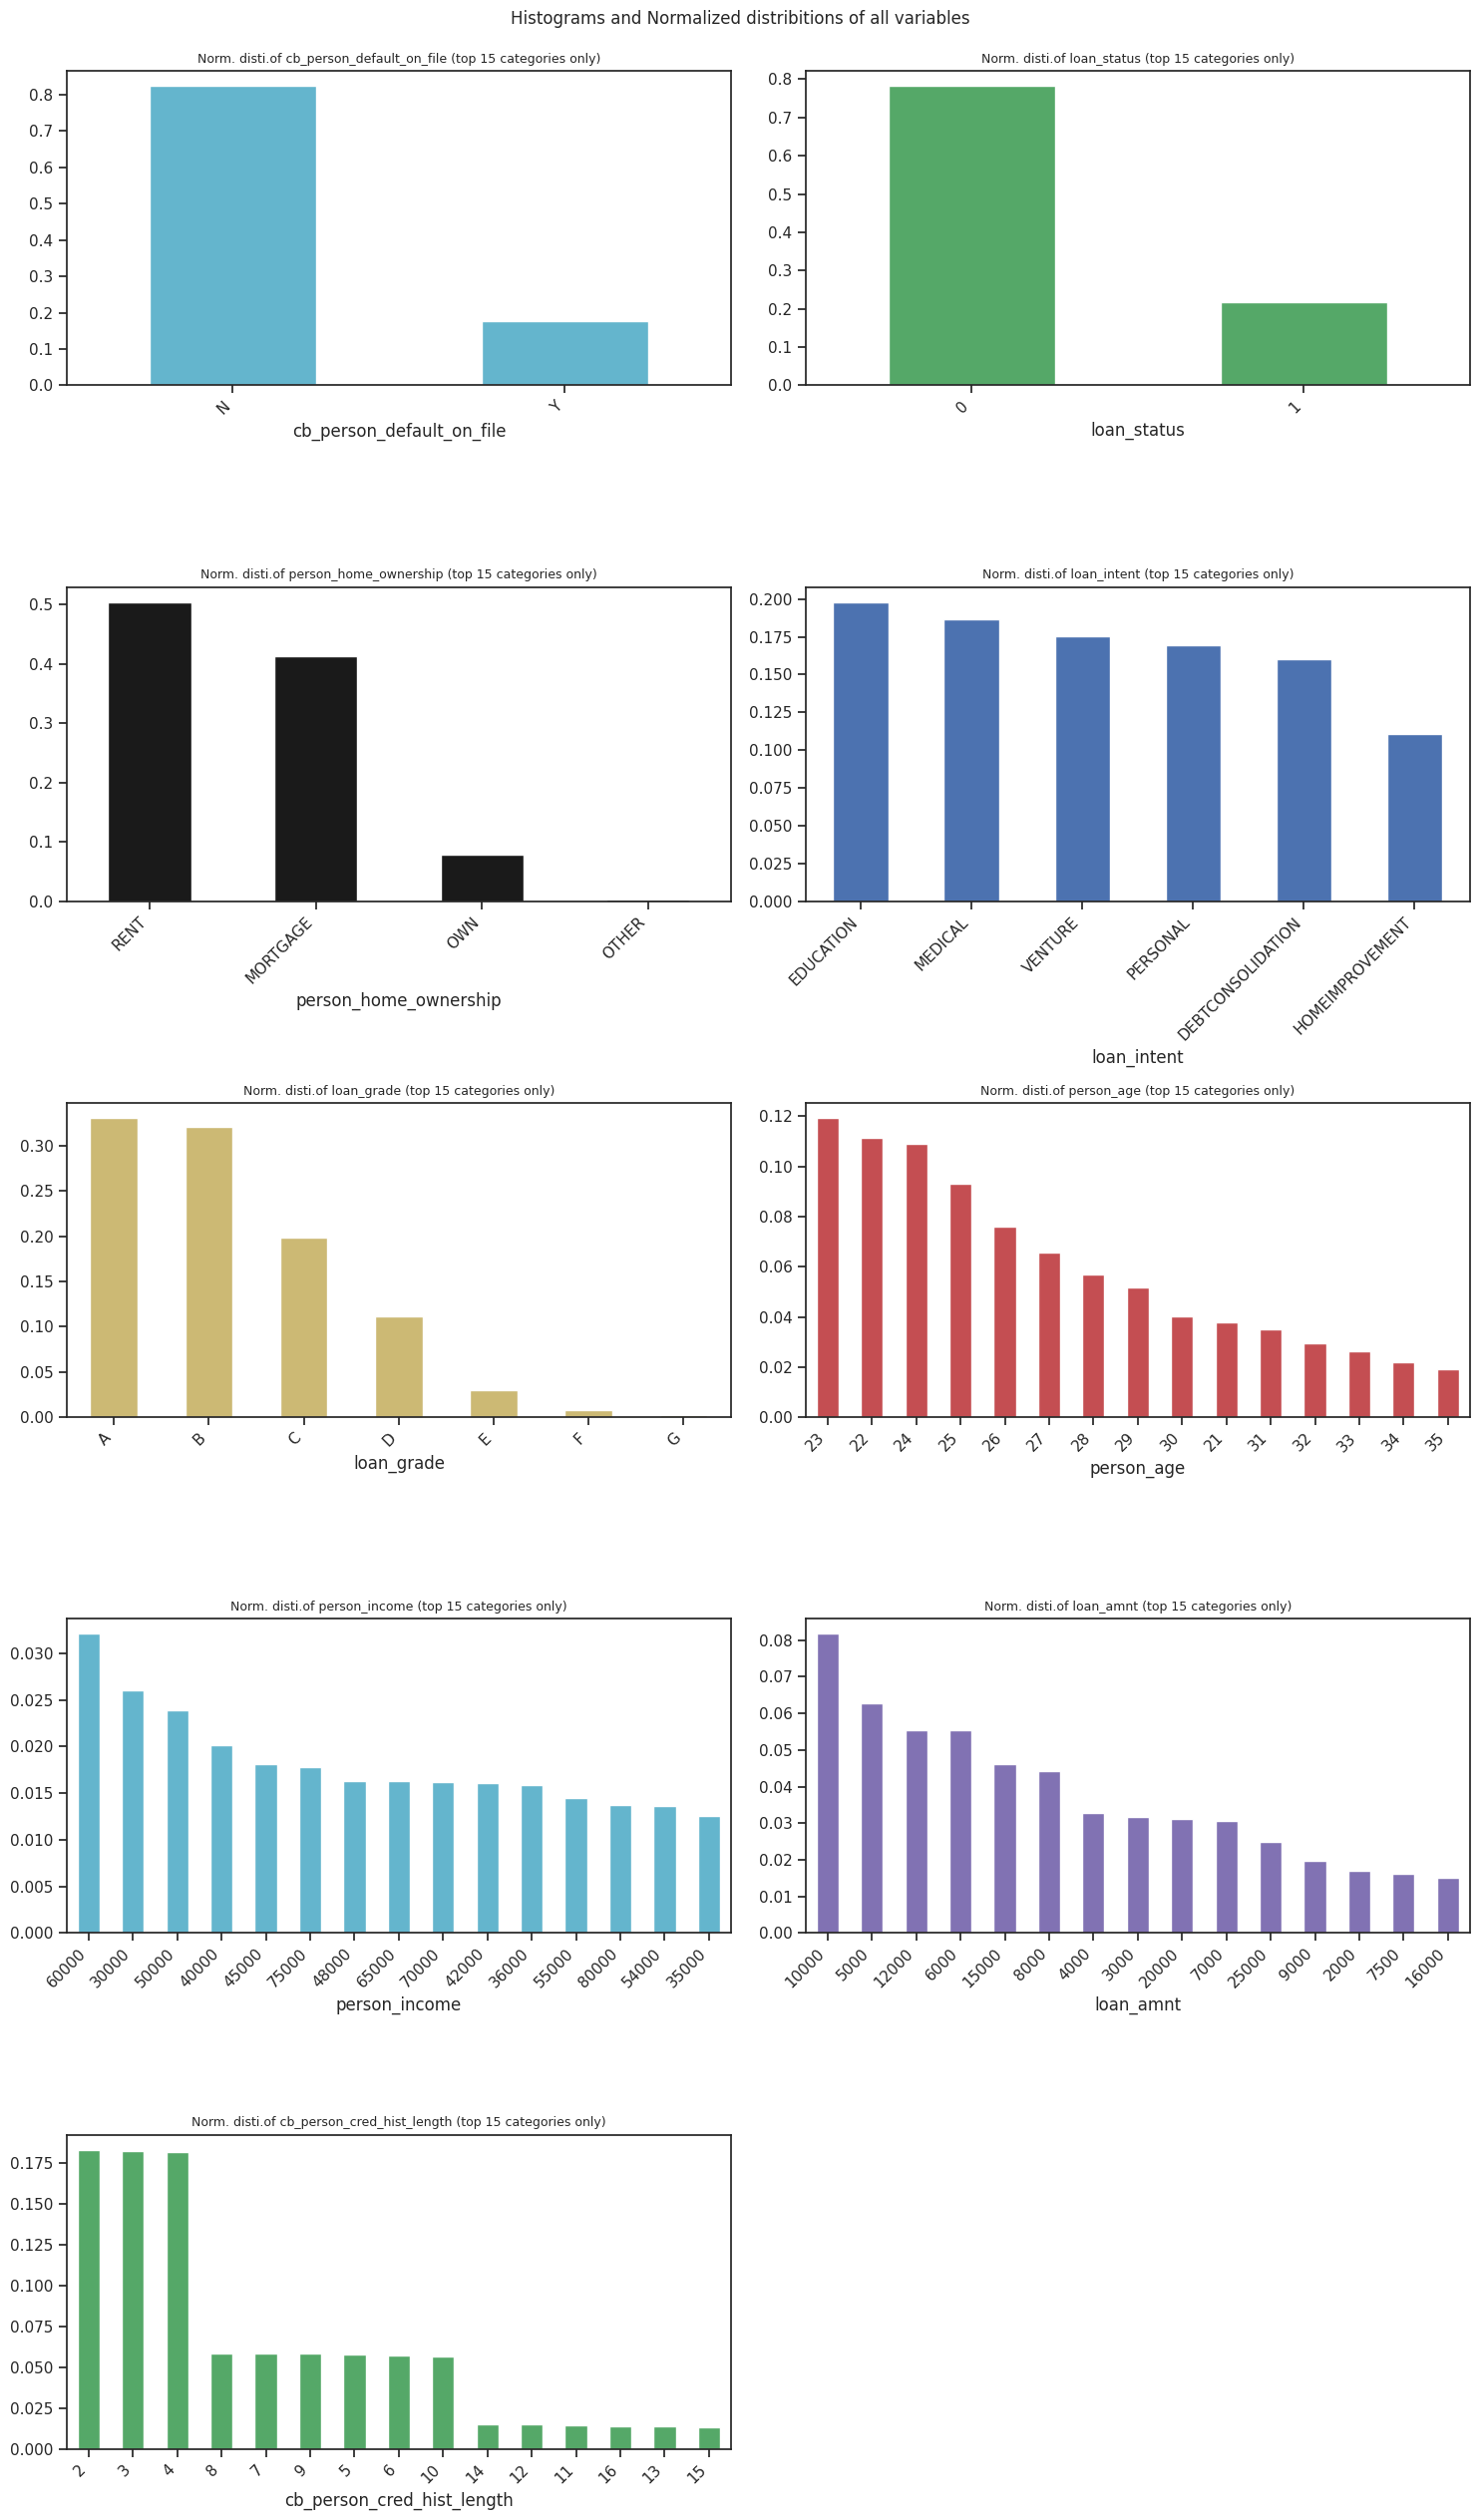

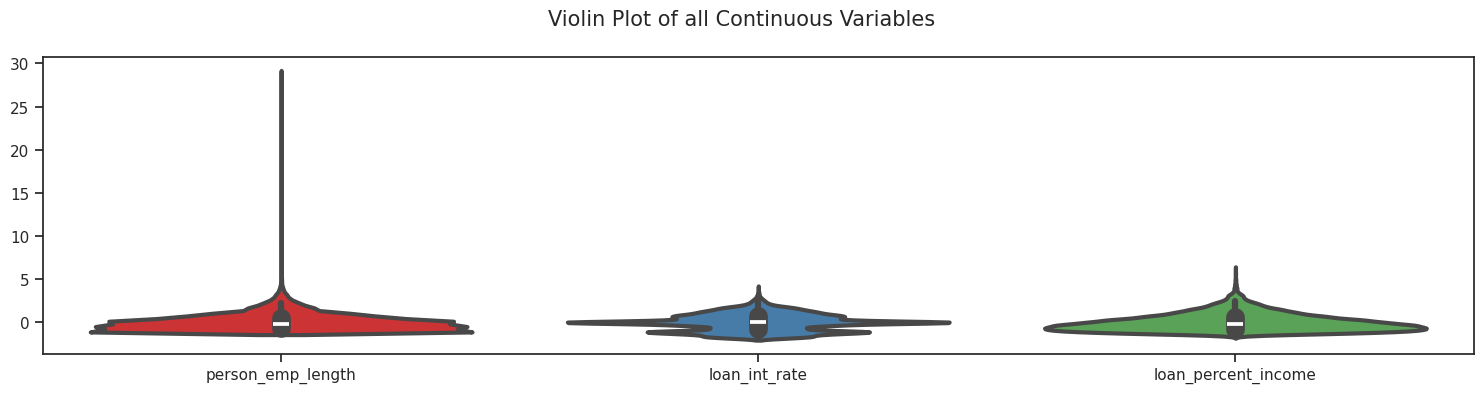

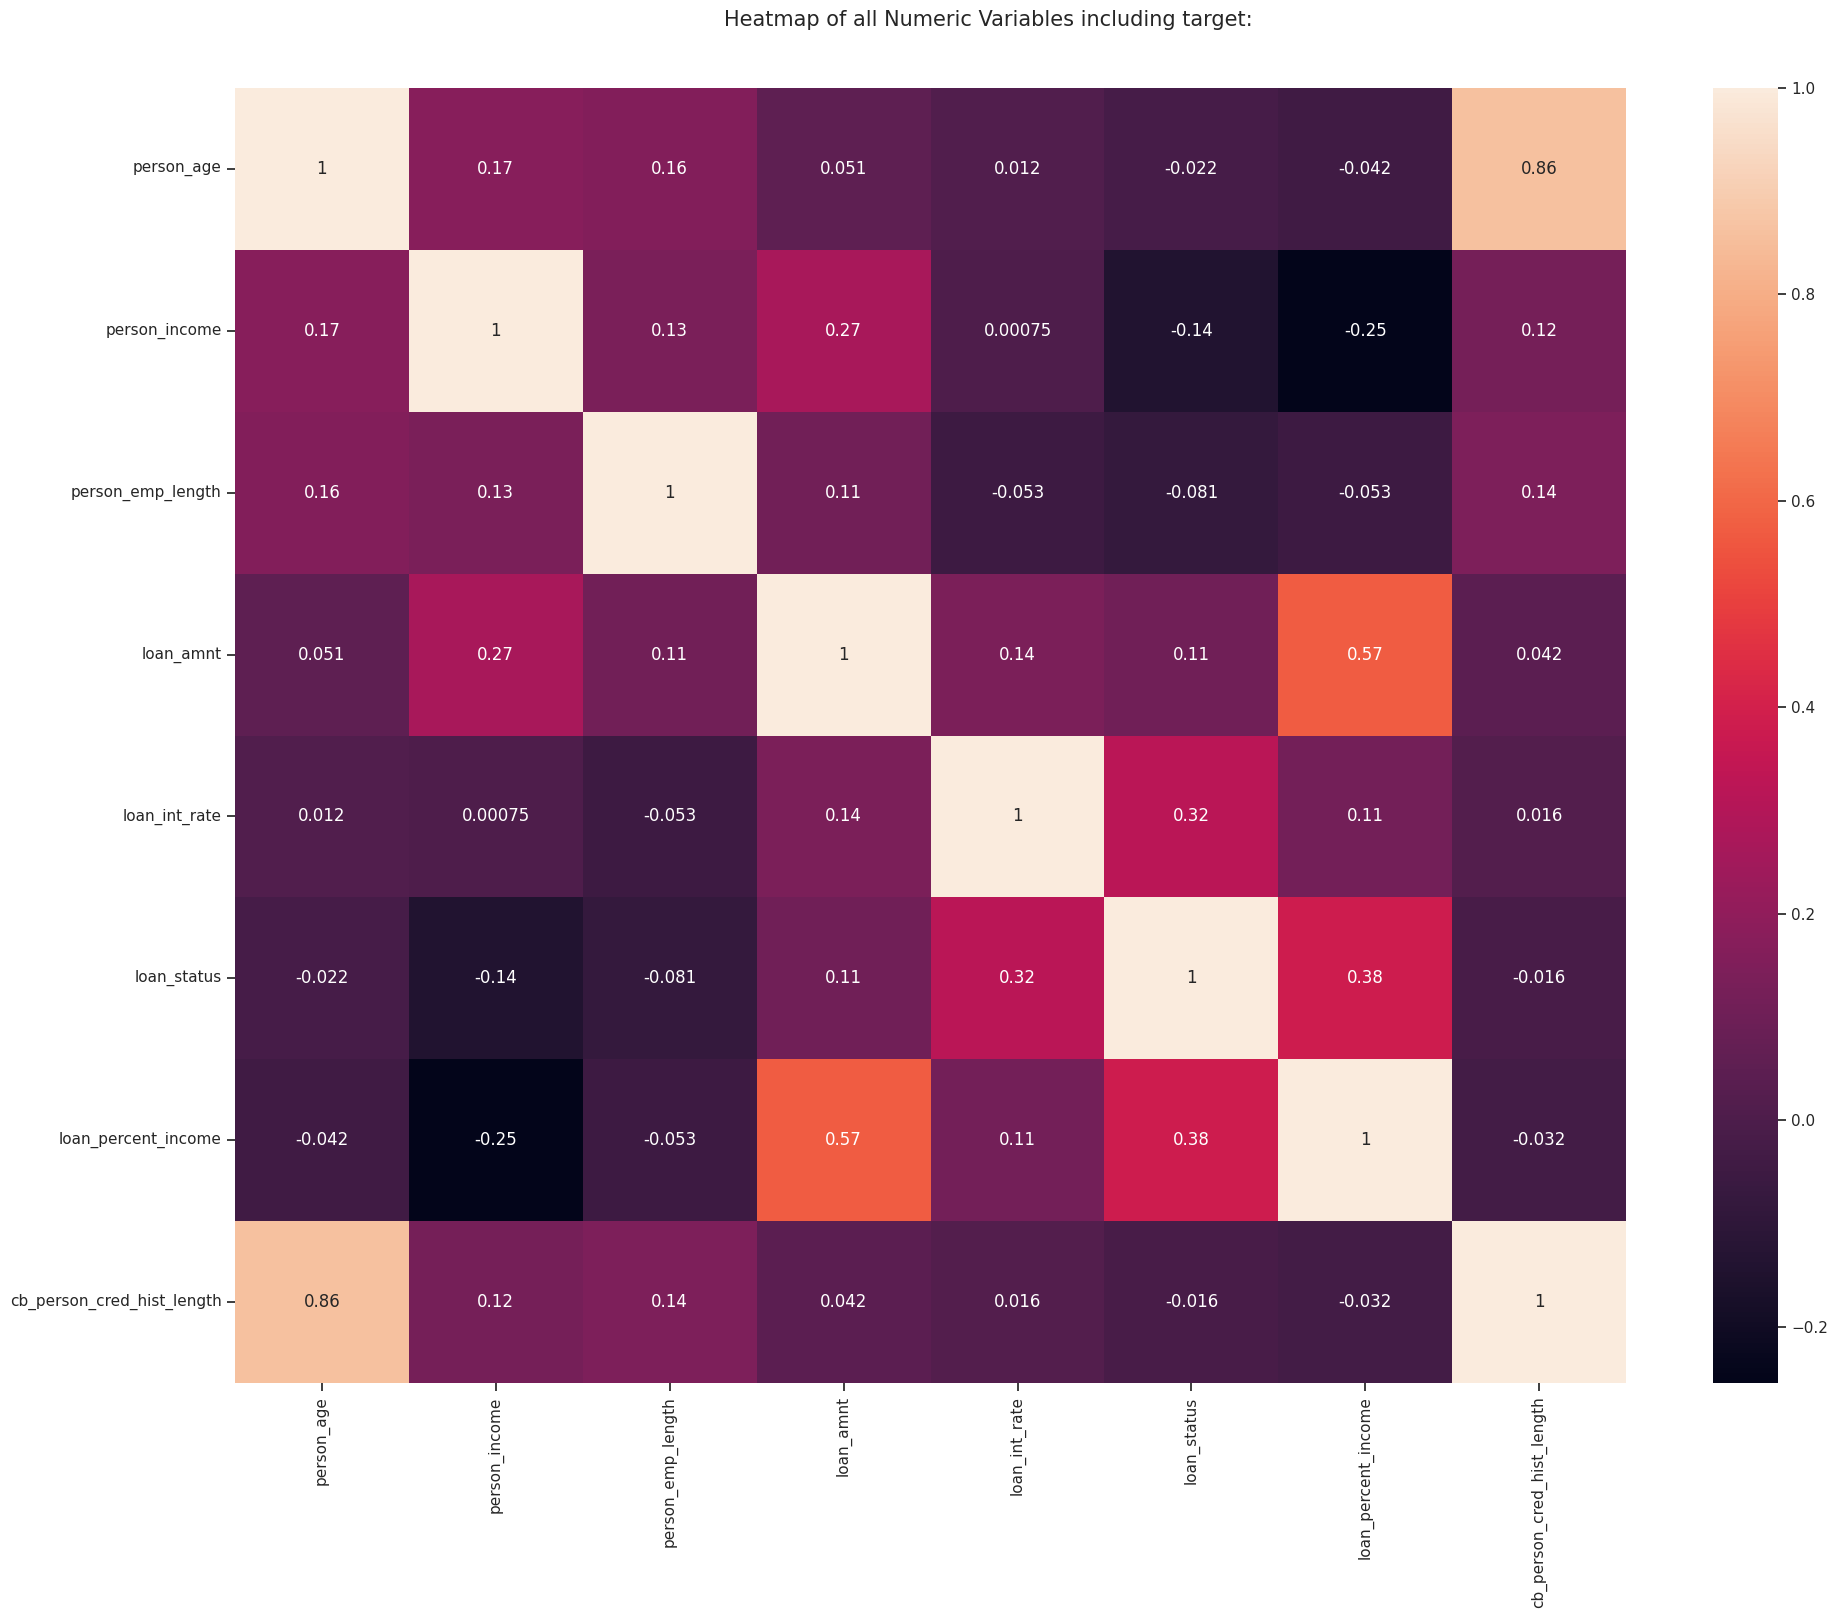

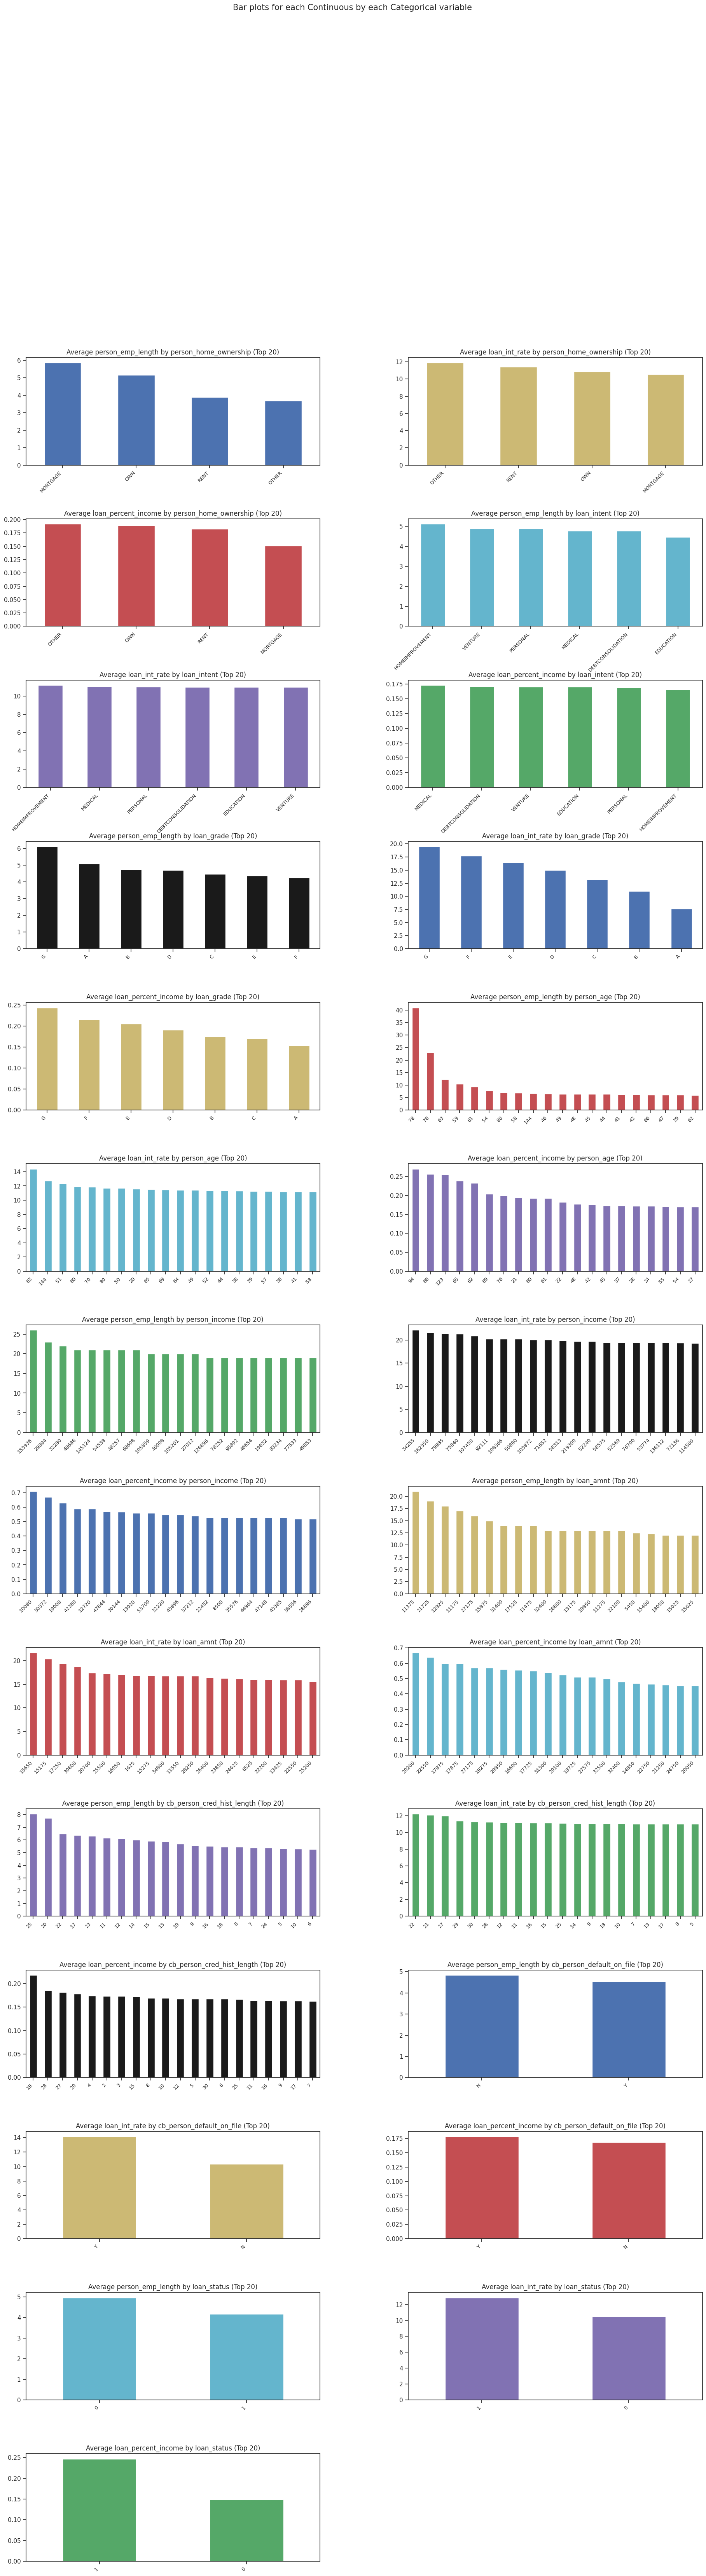

All Plots done
Time to run AutoViz = 24 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [9]:
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
%matplotlib inline
df = AV.AutoViz(df)
#aplico tecnicas de exploracion de datos automatizada.
#Con el cuadro de correlaciones identifico que
#existe una fuerte correlacion entre la edad del cliente y el largo de su historial crediticio
#Como es esperable, el monto del prestamo esta fuertemente correlacionado con su proporcionalidad con el ingreso
#La tasa de interes esta correlacionada con el estatus, es razonable pensar que a mayor tasa hay un mayor default y viceversa. Lo mismo sucede con la proporcion del prestamo con el ingreso del cliente.
#

In [10]:
!pip install ydata-profiling # installing ydata-profiling package
import ydata_profiling as pp # importing the ydata_profiling package, aliasing it to 'pp'

pp.ProfileReport(df) # Generating a profiling report on the dataframe df
#recibo mas informacion sobre las variables, e identifico que no me reporta todas las correlaciones que yo identifico anteriormente, por lo que concluyo que es una herramienta util, pero que no reemplaza al cientifico de datos

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
#termino data exploring, empiezo anomaly detection

In [12]:
!pip install pycaret
from pycaret.anomaly import *
!pip install umap-learn
import umap

# Configuro el entorno de detección de anomalías con PyCaret
anomaly_setup = setup(data=df, session_id=123)

# Creo un modelo de detección de anomalías (Isolation Forest)
iforest = create_model('iforest')

# asigno predicciones al DataFrame
anomaly_results = assign_model(iforest)

print(anomaly_results['Anomaly'].value_counts())  # Ver cuántas anomalías fueron detectadas


#plot_model(iforest, plot='umap')

# Guardar las filas detectadas como anomalías para análisis posterior
anomalies = anomaly_results[anomaly_results['Anomaly'] == 1]

# Evaluar el modelo en otros datos (opcional)
#pred_new = predict_model(iforest, data=df_test)
#pred_new.head()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.0 MB/s eta 0:00:00


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Anomaly
0    30952
1     1629
Name: count, dtype: int64


In [13]:
print(anomalies.head())

    person_age  person_income person_home_ownership  person_emp_length  \
0       22          59000                RENT              123.0         
13      26         108160                RENT                4.0         
21      25         137000                RENT                9.0         
26      21          11000            MORTGAGE                3.0         
29      21          11389               OTHER                5.0         

   loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0     PERSONAL      D        35000      16.020000         1        
13   EDUCATION      E        35000      18.389999         1        
21    PERSONAL      E        34800      16.770000         0        
26     VENTURE      E         4575      17.740000         1        
29   EDUCATION      C         4000      12.840000         1        

    loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  \
0          0.59                      Y                          3

In [14]:

plot_model(iforest, plot='umap')

In [15]:
# Filtro las filas que no son anomalías
df_cleaned = anomaly_results[anomaly_results['Anomaly'] == 0]

print(f"Número de filas después de eliminar anomalías: {df_cleaned.shape[0]}")


Número de filas después de eliminar anomalías: 30952


In [16]:
#Trabajo con el dataframe sin anomalias
df = df_cleaned

In [17]:
print(f"Número de filas después de eliminar anomalías: {df.shape[0]}")

Número de filas después de eliminar anomalías: 30952


In [18]:
#termino data exploring, emiezo feature engineering

In [19]:
#Dado que tengo una sola tabla y los datos que tengo el uso de Featuretools es limitado, realizo transformaciones manuales para obtener nuevas features

In [20]:
# hago una copia del DataFrame original
df_engineered = df.copy()

In [21]:
# Aplico transformación logarítmica
df_engineered['person_income_log'] = np.log1p(df_engineered['person_income'])
#Agrego otra relacion entre variables
df_engineered['age_income_ratio'] = df_engineered['person_age'] / df_engineered['person_income']

In [22]:
#Agrego otras variables que creo podrian tener una relacion no lineal con el estatus del prestamo
variables_relevantes = ['loan_int_rate', 'loan_percent_income']
for var in variables_relevantes:
    df_engineered[f'{var}_squared'] = df_engineered[var] ** 2
    df_engineered[f'{var}_cubed'] = df_engineered[var] ** 3

In [23]:
df_engineered.head()

person_age  person_income person_home_ownership  person_emp_length  \
1      21           9600                 OWN               5.0          
2      25           9600            MORTGAGE               1.0          
3      23          65500                RENT               4.0          
4      24          54400                RENT               8.0          
5      21           9900                 OWN               2.0          

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
1   EDUCATION      B         1000        11.14           0        
2     MEDICAL      C         5500        12.87           1        
3     MEDICAL      C        35000        15.23           1        
4     MEDICAL      C        35000        14.27           1        
5     VENTURE      A         2500         7.14           1        

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  \
1         0.10                      N                          2               
2         0.57                      N                          3               
3         0.53                      N                          2               
4         0.55                      Y                          4               
5         0.25                      N                          2               

   Anomaly  Anomaly_Score  person_income_log  age_income_ratio  \
1     0      -0.056748          9.169623          0.002188       
2     0      -0.006292          9.169623          0.002604       
3     0      -0.011914         11.089821          0.000351       
4     0      -0.011328         10.904138          0.000441       
5     0      -0.019530          9.200391          0.002121       

   loan_int_rate_squared  loan_int_rate_cubed  loan_percent_income_squared  \
1       124.099609            1382.469727                0.0100              
2       165.636902            2131.746826                0.3249              
3       231.952881            3532.642334                0.2809              
4       203.632919            2905.841797                0.3025              
5        50.979599             363.994324                0.0625              

   loan_percent_income_cubed  
1          0.001000           
2          0.185193           
3          0.148877           
4          0.166375           
5          0.015625

In [24]:
df = df_engineered

In [25]:
df.head()

person_age  person_income person_home_ownership  person_emp_length  \
1      21           9600                 OWN               5.0          
2      25           9600            MORTGAGE               1.0          
3      23          65500                RENT               4.0          
4      24          54400                RENT               8.0          
5      21           9900                 OWN               2.0          

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
1   EDUCATION      B         1000        11.14           0        
2     MEDICAL      C         5500        12.87           1        
3     MEDICAL      C        35000        15.23           1        
4     MEDICAL      C        35000        14.27           1        
5     VENTURE      A         2500         7.14           1        

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  \
1         0.10                      N                          2               
2         0.57                      N                          3               
3         0.53                      N                          2               
4         0.55                      Y                          4               
5         0.25                      N                          2               

   Anomaly  Anomaly_Score  person_income_log  age_income_ratio  \
1     0      -0.056748          9.169623          0.002188       
2     0      -0.006292          9.169623          0.002604       
3     0      -0.011914         11.089821          0.000351       
4     0      -0.011328         10.904138          0.000441       
5     0      -0.019530          9.200391          0.002121       

   loan_int_rate_squared  loan_int_rate_cubed  loan_percent_income_squared  \
1       124.099609            1382.469727                0.0100              
2       165.636902            2131.746826                0.3249              
3       231.952881            3532.642334                0.2809              
4       203.632919            2905.841797                0.3025              
5        50.979599             363.994324                0.0625              

   loan_percent_income_cubed  
1          0.001000           
2          0.185193           
3          0.148877           
4          0.166375           
5          0.015625

In [26]:
from pycaret.datasets import get_data

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['person_home_ownership'] = le.fit_transform(df['person_home_ownership'])
df['loan_intent'] = le.fit_transform(df['loan_intent'])
df['loan_grade'] = le.fit_transform(df['loan_grade'])
df['cb_person_default_on_file'] = le.fit_transform(df['cb_person_default_on_file'])


In [28]:
df.head()

person_age  person_income  person_home_ownership  person_emp_length  \
1      21           9600                2                   5.0          
2      25           9600                0                   1.0          
3      23          65500                3                   4.0          
4      24          54400                3                   8.0          
5      21           9900                2                   2.0          

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_status  \
1       1            1         1000        11.14           0        
2       3            2         5500        12.87           1        
3       3            2        35000        15.23           1        
4       3            2        35000        14.27           1        
5       5            0         2500         7.14           1        

   loan_percent_income  cb_person_default_on_file  cb_person_cred_hist_length  \
1         0.10                      0                           2               
2         0.57                      0                           3               
3         0.53                      0                           2               
4         0.55                      1                           4               
5         0.25                      0                           2               

   Anomaly  Anomaly_Score  person_income_log  age_income_ratio  \
1     0      -0.056748          9.169623          0.002188       
2     0      -0.006292          9.169623          0.002604       
3     0      -0.011914         11.089821          0.000351       
4     0      -0.011328         10.904138          0.000441       
5     0      -0.019530          9.200391          0.002121       

   loan_int_rate_squared  loan_int_rate_cubed  loan_percent_income_squared  \
1       124.099609            1382.469727                0.0100              
2       165.636902            2131.746826                0.3249              
3       231.952881            3532.642334                0.2809              
4       203.632919            2905.841797                0.3025              
5        50.979599             363.994324                0.0625              

   loan_percent_income_cubed  
1          0.001000           
2          0.185193           
3          0.148877           
4          0.166375           
5          0.015625

In [29]:
df_train = df.sample(frac=0.80, random_state=42)
df_test = df.drop(df_train.index)

df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

print('Data for Modeling          : ' + str(df_train.shape))
print('Unseen Data For Predictions: ' + str(df_test.shape))

Data for Modeling          : (24762, 20)
Unseen Data For Predictions: (6190, 20)


In [30]:
from pycaret.classification import *

In [31]:
df.head()

person_age  person_income  person_home_ownership  person_emp_length  \
1      21           9600                2                   5.0          
2      25           9600                0                   1.0          
3      23          65500                3                   4.0          
4      24          54400                3                   8.0          
5      21           9900                2                   2.0          

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_status  \
1       1            1         1000        11.14           0        
2       3            2         5500        12.87           1        
3       3            2        35000        15.23           1        
4       3            2        35000        14.27           1        
5       5            0         2500         7.14           1        

   loan_percent_income  cb_person_default_on_file  cb_person_cred_hist_length  \
1         0.10                      0                           2               
2         0.57                      0                           3               
3         0.53                      0                           2               
4         0.55                      1                           4               
5         0.25                      0                           2               

   Anomaly  Anomaly_Score  person_income_log  age_income_ratio  \
1     0      -0.056748          9.169623          0.002188       
2     0      -0.006292          9.169623          0.002604       
3     0      -0.011914         11.089821          0.000351       
4     0      -0.011328         10.904138          0.000441       
5     0      -0.019530          9.200391          0.002121       

   loan_int_rate_squared  loan_int_rate_cubed  loan_percent_income_squared  \
1       124.099609            1382.469727                0.0100              
2       165.636902            2131.746826                0.3249              
3       231.952881            3532.642334                0.2809              
4       203.632919            2905.841797                0.3025              
5        50.979599             363.994324                0.0625              

   loan_percent_income_cubed  
1          0.001000           
2          0.185193           
3          0.148877           
4          0.166375           
5          0.015625

In [32]:
exp_clf101 = setup(data = df_train, target = 'loan_status', session_id=10001)

In [33]:
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [34]:
print(best_model)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=10001, reg_alpha=0, ...)


In [35]:
#Ademas de probar con los mejores modelos, tambien pruebo con decision trees, ya que son faciles de interpretar y estoy muy familirizado con ellos

In [36]:
#Despues de probar con los 4 modelos xgboos demostro ser el mejor modelo para este caso, especialmente en Recall y Precision, que para este caso en particular son las metricas que mas me interesan, dado que si se omiten demasiados casos de default (falsos negativos) el impacto financiero para la institución puede ser muy grave y n bajo precision significa que el modelo etiqueta equivocadamente a clientes confiables como de alto riesgo , lo que podria llevar a la institución a rechazar a los clientes equivocados, perdiendo ingresos

In [37]:
dt = create_model('dt')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [38]:
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [39]:
lightgbm  = create_model('lightgbm')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [40]:
xgboost = create_model('xgboost')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [41]:
#Tuneo modelos

In [42]:
tuned_dt = tune_model(dt)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [43]:
tuned_rf = tune_model(rf)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [44]:
tuned_lightgbm = tune_model(lightgbm)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [45]:
tuned_xgboost = tune_model(xgboost)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [46]:
#elijo XGBoost, por lo explicado anteriormente

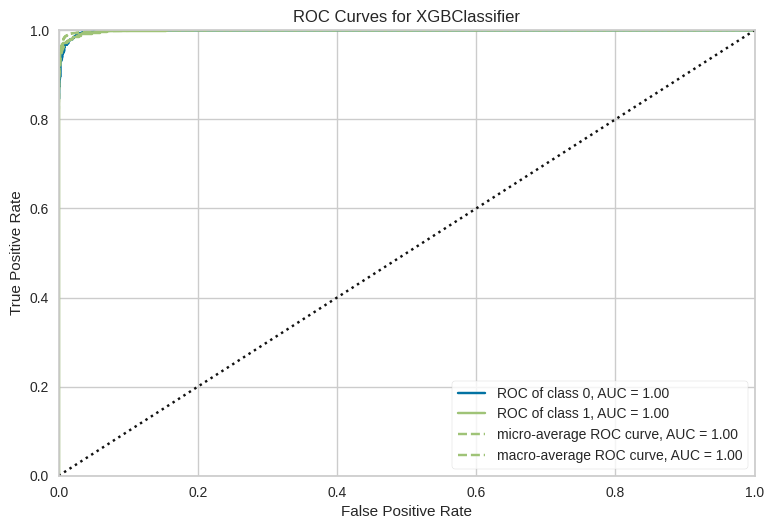

In [47]:
plot_model(tuned_xgboost, plot = 'auc')

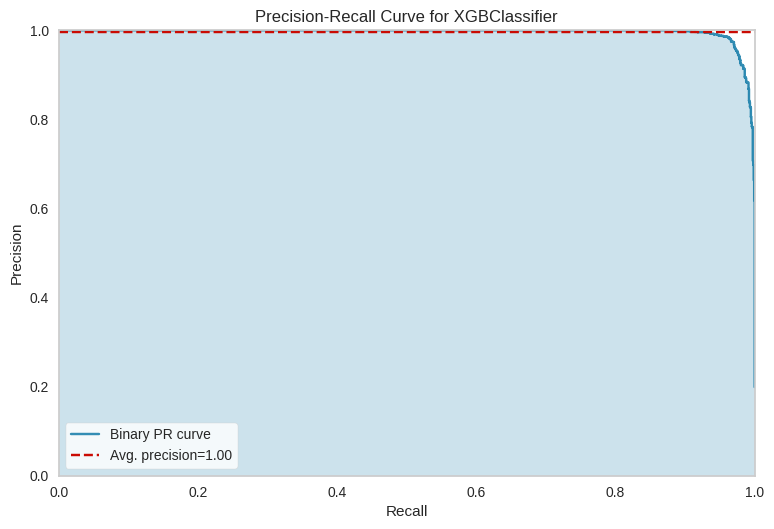

In [48]:
plot_model(tuned_xgboost, plot = 'pr')

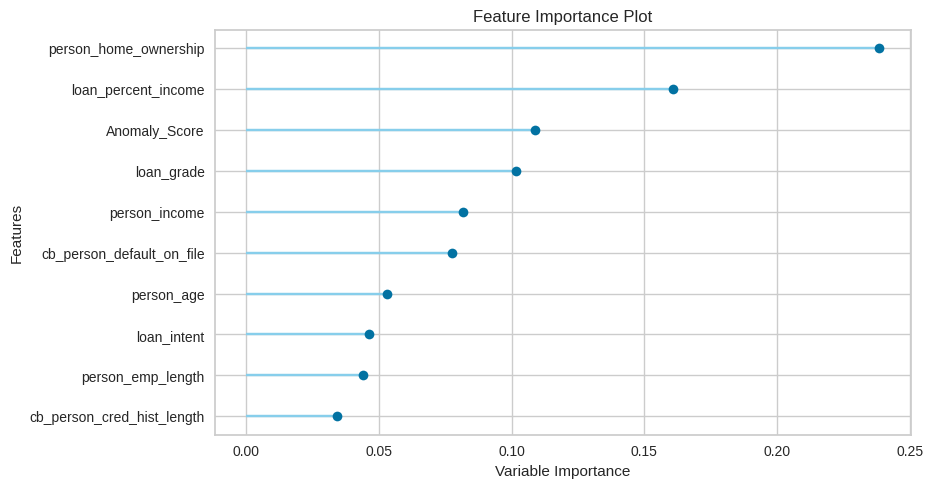

In [49]:
plot_model(tuned_xgboost, plot='feature')

In [50]:
plot_model(tuned_xgboost, plot = 'confusion_matrix')

In [51]:
evaluate_model(tuned_xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [52]:
predict_model(tuned_xgboost)

person_age  person_income  person_home_ownership  person_emp_length  \
22349      23          69935                0                   2.0          
14603      28          99996                3                   7.0          
22079      25          78000                3                   5.0          
7644       27          65000                0                  11.0          
23233      25          15000                2                   9.0          
...           ...            ...                    ...                ...   
2207       24          75000                0                   7.0          
20965      28          33288                3                   2.0          
3361       30          87580                2                  15.0          
2672       41          62004                3                   5.0          
9421       27         125000                0                   7.0          

       loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
22349       3            0         7200       7.490000           0.10           
14603       3            1         5000      11.490000           0.05           
22079       2            2         3200      12.990000           0.04           
7644        0            0        19200       7.490000           0.30           
23233       5            0         2000       6.910000           0.13           
...            ...         ...        ...            ...                  ...   
2207        2            2        12000      13.490000           0.16           
20965       1            2        10800      12.090000           0.32           
3361        3            0         4700      11.011695           0.05           
2672        2            0        14000       8.900000           0.23           
9421        1            0         9000       7.510000           0.07           

       cb_person_default_on_file  ...  Anomaly_Score  person_income_log  \
22349              0              ...   -0.116510         11.155335       
14603              0              ...   -0.103967         11.512896       
22079              1              ...   -0.052891         11.264477       
7644               0              ...   -0.076973         11.082158       
23233              0              ...   -0.069249          9.615872       
...                          ...  ...            ...                ...   
2207               1              ...   -0.062307         11.225257       
20965              0              ...   -0.066343         10.412982       
3361               0              ...   -0.024405         11.380320       
2672               0              ...   -0.074237         11.034970       
9421               0              ...   -0.102880         11.736077       

       age_income_ratio  loan_int_rate_squared  loan_int_rate_cubed  \
22349      0.000329            56.100098             420.189697       
14603      0.000280           132.020096            1516.910889       
22079      0.000321           168.740097            2191.933838       
7644       0.000415            56.100098             420.189697       
23233      0.001667            47.748096             329.939362       
...                 ...                    ...                  ...   
2207       0.000320           181.980087            2454.911377       
20965      0.000841           146.168106            1767.172363       
3361       0.000343           121.257423            1335.249756       
2672       0.000661            79.209991             704.968933       
9421       0.000216            56.400105             423.564789       

       loan_percent_income_squared  loan_percent_income_cubed  loan_status  \
22349            0.0100                     0.001000                0        
14603            0.0025                     0.000125                0        
22079            0.0016                     0.000064                0        
7644             0.0900        

In [53]:
final_xgboost = finalize_model(tuned_xgboost)

In [54]:
print(final_xgboost)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['person_age', 'person_income',
                                             'person_home_ownership',
                                             'person_emp_length', 'loan_intent',
                                             'loan_grade', 'loan_amnt',
                                             'loan_int_rate',
                                             'loan_percent_income',
                                             'cb_person_default_on_file',
                                             'cb_person_cred_hist_length',
                                             'Anomaly', 'Anomaly_Score',
                                             'person_in...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
      

In [55]:
predict_model(final_xgboost)

person_age  person_income  person_home_ownership  person_emp_length  \
22349      23          69935                0                   2.0          
14603      28          99996                3                   7.0          
22079      25          78000                3                   5.0          
7644       27          65000                0                  11.0          
23233      25          15000                2                   9.0          
...           ...            ...                    ...                ...   
2207       24          75000                0                   7.0          
20965      28          33288                3                   2.0          
3361       30          87580                2                  15.0          
2672       41          62004                3                   5.0          
9421       27         125000                0                   7.0          

       loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
22349       3            0         7200       7.490000           0.10           
14603       3            1         5000      11.490000           0.05           
22079       2            2         3200      12.990000           0.04           
7644        0            0        19200       7.490000           0.30           
23233       5            0         2000       6.910000           0.13           
...            ...         ...        ...            ...                  ...   
2207        2            2        12000      13.490000           0.16           
20965       1            2        10800      12.090000           0.32           
3361        3            0         4700      11.011695           0.05           
2672        2            0        14000       8.900000           0.23           
9421        1            0         9000       7.510000           0.07           

       cb_person_default_on_file  ...  Anomaly_Score  person_income_log  \
22349              0              ...   -0.116510         11.155335       
14603              0              ...   -0.103967         11.512896       
22079              1              ...   -0.052891         11.264477       
7644               0              ...   -0.076973         11.082158       
23233              0              ...   -0.069249          9.615872       
...                          ...  ...            ...                ...   
2207               1              ...   -0.062307         11.225257       
20965              0              ...   -0.066343         10.412982       
3361               0              ...   -0.024405         11.380320       
2672               0              ...   -0.074237         11.034970       
9421               0              ...   -0.102880         11.736077       

       age_income_ratio  loan_int_rate_squared  loan_int_rate_cubed  \
22349      0.000329            56.100098             420.189697       
14603      0.000280           132.020096            1516.910889       
22079      0.000321           168.740097            2191.933838       
7644       0.000415            56.100098             420.189697       
23233      0.001667            47.748096             329.939362       
...                 ...                    ...                  ...   
2207       0.000320           181.980087            2454.911377       
20965      0.000841           146.168106            1767.172363       
3361       0.000343           121.257423            1335.249756       
2672       0.000661            79.209991             704.968933       
9421       0.000216            56.400105             423.564789       

       loan_percent_income_squared  loan_percent_income_cubed  loan_status  \
22349            0.0100                     0.001000                0        
14603            0.0025                     0.000125                0        
22079            0.0016                     0.000064                0        
7644             0.0900        

In [56]:
#Comienzo pasaje a produccion

In [57]:
save_model(final_xgboost,'C:\\Users\\andgo\\Desktop\\maestria data science\\analitica big data')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['person_age', 'person_income',
                                              'person_home_ownership',
                                              'person_emp_length', 'loan_intent',
                                              'loan_grade', 'loan_amnt',
                                              'loan_int_rate',
                                              'loan_percent_income',
                                              'cb_person_default_on_file',
                                              'cb_person_cred_hist_length',
                                              'Anomaly', 'Anomaly_Score',
                                              'person_in...
                                gamma=0, gpu_id=-1, grow_policy='depthwise',
                                importance_type=None, interaction_constra

In [58]:
from pycaret.classification import *

In [59]:
load_model(r'C:\Users\andgo\Desktop\maestria data science\analitica big data')

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['person_age', 'person_income',
                                             'person_home_ownership',
                                             'person_emp_length', 'loan_intent',
                                             'loan_grade', 'loan_amnt',
                                             'loan_int_rate',
                                             'loan_percent_income',
                                             'cb_person_default_on_file',
                                             'cb_person_cred_hist_length',
                                             'Anomaly', 'Anomaly_Score'...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=-1, num_parallel_tree=1,
                               objective='binary:logistic', predictor='auto',
                               random_state=10001, reg_alpha=0, ...))],
         verbose=False)

In [60]:
saved_final_xgboost = load_model(r'C:\Users\andgo\Desktop\maestria data science\analitica big data')

Transformation Pipeline and Model Successfully Loaded


In [61]:
new_prediction = predict_model(saved_final_xgboost, data=df_test)

In [62]:
new_prediction.head()

person_age  person_income  person_home_ownership  person_emp_length  \
0      22          85000                3                   6.0          
1      23          95000                3                   2.0          
2      23         500000                0                   7.0          
3      23         113000                3                   8.0          
4      24          65000                3                   6.0          

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0       5            1        35000        10.37             0.41           
1       5            0        35000         7.90             0.37           
2       0            1        30000        10.65             0.06           
3       0            3        35000        18.25             0.31           
4       2            1        32500         9.99             0.50           

   cb_person_default_on_file  ...  Anomaly_Score  person_income_log  \
0              0              ...   -0.051293         11.350418       
1              0              ...   -0.021055         11.461642       
2              0              ...   -0.019011         13.122365       
3              0              ...   -0.000406         11.635152       
4              0              ...   -0.029974         11.082158       

   age_income_ratio  loan_int_rate_squared  loan_int_rate_cubed  \
0      0.000259           107.536896            1115.157593       
1      0.000242            62.410000             493.039032       
2      0.000046           113.422493            1207.949463       
3      0.000204           333.062500            6078.390625       
4      0.000369            99.800095             997.002930       

   loan_percent_income_squared  loan_percent_income_cubed  loan_status  \
0            0.1681                     0.068921                1        
1            0.1369                     0.050653                1        
2            0.0036                     0.000216                0        
3            0.0961                     0.029791                1        
4            0.2500                     0.125000                1        

   prediction_label  prediction_score  
0          1              0.9973       
1          1              0.9995       
2          0              0.9777       
3          1              0.9994       
4          1              0.9998       

[5 rows x 22 columns]

In [63]:
########

In [64]:
#aplico feature reduction luego de haber entrenado un modelo, para apreciar su diferencia. Voy a usar LDA ya que mi interes principal es lograr separar las clases, clasificarlos correctamente entre quienes hacen default y quienes no

In [65]:
X_train = df_train.drop('loan_status', axis=1)
y_train = df_train['loan_status']

X_test = df_test.drop('loan_status', axis=1)
y_test = df_test['loan_status']


In [66]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1) # o el número de componentes que desees
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)


In [67]:
# Volvemos a unir la variable objetivo
df_train_lda = pd.DataFrame(X_train_lda, columns=['LD1'])
df_train_lda['loan_status'] = y_train.values

df_test_lda = pd.DataFrame(X_test_lda, columns=['LD1'])
df_test_lda['loan_status'] = y_test.values


In [68]:
exp_clf102 = setup(data = df_train_lda, target = 'loan_status', session_id=10001)

In [69]:
#aplico directamente el mismo modelo

In [70]:
xgboost = create_model('xgboost')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [71]:
tuned_xgboost = tune_model(xgboost)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [72]:
#Al comparar el rendimiento antes de aplicar LDA con el de despues, vemos que aunque el modelo se genero a una velocidad mucho mayor, se esta perdiendo mucha informacion que permitia encontrar relaciones y patrones mas complejas